In [14]:
import torch
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
from typing import Callable, Optional
from probe_model import DRCProbe
from create_probe_dataset import ProbingDataset
import numpy as np
from matplotlib import colors
import matplotlib.pyplot as plt
import thinker
#import thinker.viz_utils as viz
import thinker.util as util
import gym
import gym_sokoban
import torch.nn.functional as F
import pandas as pd
import numpy as np

In [2]:
from train_probe import DRCProbe

In [4]:
probe = DRCProbe(drc_layer=2,
                     drc_tick=3,
                     drc_channels="hidden",
                     linear=True,
                     num_layers=1,
                     hidden_dim=1,
                     target_dim=5)

In [ ]:
# b,c,8,8
# b, c*64
# -->
# t, c*64
# c*64, t
# c, 64*t

In [36]:
probe.network.weight.shape

torch.Size([5, 2048])

In [49]:
probe.network.weight.abs().permute(1,0).reshape(32,64*5).mean(dim=-1)

tensor([0.0116, 0.0110, 0.0110, 0.0118, 0.0117, 0.0106, 0.0105, 0.0113, 0.0103,
        0.0108, 0.0111, 0.0112, 0.0104, 0.0107, 0.0110, 0.0111, 0.0110, 0.0109,
        0.0112, 0.0107, 0.0110, 0.0108, 0.0109, 0.0113, 0.0109, 0.0110, 0.0109,
        0.0112, 0.0100, 0.0107, 0.0110, 0.0111], grad_fn=<MeanBackward1>)

In [50]:
probe.network.weight.abs().reshape(32,64*5).mean(dim=-1)

tensor([0.0111, 0.0112, 0.0108, 0.0104, 0.0112, 0.0107, 0.0113, 0.0112, 0.0104,
        0.0111, 0.0109, 0.0117, 0.0106, 0.0114, 0.0107, 0.0110, 0.0108, 0.0108,
        0.0105, 0.0113, 0.0109, 0.0107, 0.0106, 0.0110, 0.0104, 0.0116, 0.0109,
        0.0112, 0.0112, 0.0111, 0.0113, 0.0106], grad_fn=<MeanBackward1>)

In [41]:
probe.network.weight.permute(1,0).abs().mean(dim=1).tolist()[:3]

[0.008439681492745876, 0.014364758506417274, 0.007447266485542059]

In [32]:
val_dataset = torch.load("./data/val_data.pt")
val_dataset[0].keys()

dict_keys(['adj_walls', 'adj_boxnotontar', 'adj_boxontar', 'adj_box', 'adj_tar', 'num_boxnotontar', 'agent_loc', 'box_loc', 'action', 'value', 'board_state', 'hidden_states', 'board_num', 'reward', 'action_ahead_1', 'action_ahead_2', 'action_ahead_3', 'reward_ahead_1', 'reward_ahead_2', 'reward_ahead_3', 'value_ahead_1', 'value_ahead_2', 'value_ahead_3', 'agent_loc_ahead_1', 'agent_loc_ahead_2', 'agent_loc_ahead_3', 'box_loc_ahead_1', 'box_loc_ahead_2', 'box_loc_ahead_3', 'action_traj_1', 'action_traj_2', 'action_traj_3', 'reward_traj_1', 'reward_traj_2', 'reward_traj_3', 'value_traj_1', 'value_traj_2', 'value_traj_3', 'num_boxnotontar_until_change', 'action_until_change', 'box_loc_until_change', 'box_loc_change_loc', 'steps_remaining', 'steps_taken', 'num_boxnotontar_until_change_lessthan_1', 'num_boxnotontar_until_change_lessthan_3', 'num_boxnotontar_until_change_lessthan_5', 'steps_remaining_lessthan_1', 'steps_remaining_lessthan_3', 'steps_remaining_lessthan_5', 'action_until_chang

In [ ]:
for trans_idx, trans in enumerate(val_dataset):
    future_idx = 1
    while future_idx < len()

In [56]:
torch.abs(torch.tensor(val_dataset[0]["box_loc"]) - torch.tensor(val_dataset[4]["box_loc"])).argmax().item()

2

In [3]:
val_dataset[0].keys()

dict_keys(['adj_walls', 'adj_boxnotontar', 'adj_boxontar', 'adj_tar', 'num_boxnotontar', 'agent_loc', 'box_loc', 'action', 'value', 'board_state', 'hidden_states', 'board_num', 'reward', 'action_ahead_1', 'action_ahead_2', 'action_ahead_3', 'reward_ahead_1', 'reward_ahead_2', 'reward_ahead_3', 'value_ahead_1', 'value_ahead_2', 'value_ahead_3', 'agent_loc_ahead_1', 'agent_loc_ahead_2', 'agent_loc_ahead_3', 'box_loc_ahead_1', 'box_loc_ahead_2', 'box_loc_ahead_3', 'action_traj_1', 'action_traj_2', 'action_traj_3', 'reward_traj_1', 'reward_traj_2', 'reward_traj_3', 'value_traj_1', 'value_traj_2', 'value_traj_3', 'num_boxnotontar_until_change', 'action_until_change', 'box_loc_change_loc', 'steps_remaining', 'num_boxnotontar_until_change_lessthan_1', 'num_boxnotontar_until_change_lessthan_3', 'num_boxnotontar_until_change_lessthan_5', 'steps_remaining_lessthan_1', 'steps_remaining_lessthan_3', 'steps_remaining_lessthan_5', 'action_until_change_lessthan_0'])

In [33]:
results = pd.read_csv("./results/test.csv")

In [34]:
weights = [float(s) for s in results["action_linear_layer2_channelhidden_tick3"][4].strip("[]").split(", ")]

In [51]:
weights = [0.1773, 0.0485, 0.1035, 0.5609, 0.1242, 0.1044, 0.0961, 0.1722, 0.1480,
        0.1609, 0.1480, 0.1818, 0.1854, 0.1300, 0.1218, 0.1099, 0.1905, 0.1437,
        0.1737, 0.0430, 0.1152, 0.4622, 0.6324, 0.1492, 0.3597, 0.1442, 0.5064,
        0.1224, 0.1815, 0.1140, 0.1977, 0.2997]

<BarContainer object of 32 artists>

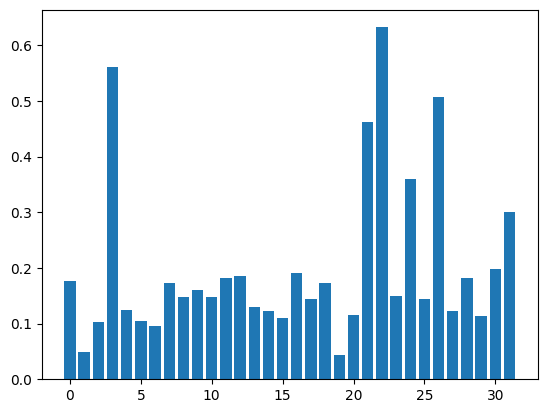

In [52]:
plt.bar(range(32), weights)

In [51]:
feature = "action_ahead_1"
results = pd.read_csv(f"./results/{feature}_multi.csv")
test_accs = list(results.iloc[-1,1:].values[-1:]) + list(results.iloc[-1,1:].values[:3]) + list(results.iloc[-1,1:].values[4:6]) + list(results.iloc[-1,1:].values[7:-1])
labs = results.keys().to_list()[1:][:3] + results.keys().to_list()[1:][4:6] + results.keys().to_list()[1:][7:]
fig, ax = plt.subplots()
cols = ["purple"] + ["green"]*3 + ["blue"]*3 + ["red"]*3
labs = ["x_enc", "hidden_0", "cell_0", "hidden+x_enc_0", "hidden_1", "cell_1", "hidden+x_enc_1", "hidden_2", "cell_2", "hidden+x_enc_2"]
ax.bar(labs, test_accs, color=cols)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0,1)
ax.set_ylabel("test acc (%)")
ax.set_title(f"Linear probe: {feature}")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './results/action_ahead_1_multi.csv'

In [6]:
results.iloc[-1,1:]

action_linear_layer2_channel[32]_tick3    0.285714
action_linear_layer2_channel[33]_tick3    0.243386
action_linear_layer2_channel[34]_tick3    0.248677
action_linear_layer2_channel[35]_tick3    0.455026
action_linear_layer2_channel[36]_tick3    0.333333
action_linear_layer2_channel[37]_tick3    0.206349
action_linear_layer2_channel[38]_tick3    0.322751
action_linear_layer2_channel[39]_tick3    0.291005
action_linear_layer2_channel[40]_tick3    0.291005
action_linear_layer2_channel[41]_tick3    0.328042
action_linear_layer2_channel[42]_tick3    0.359788
action_linear_layer2_channel[43]_tick3    0.222222
action_linear_layer2_channel[44]_tick3     0.31746
action_linear_layer2_channel[45]_tick3    0.301587
action_linear_layer2_channel[46]_tick3    0.312169
action_linear_layer2_channel[47]_tick3    0.338624
action_linear_layer2_channel[48]_tick3    0.402116
action_linear_layer2_channel[49]_tick3    0.291005
action_linear_layer2_channel[50]_tick3    0.301587
action_linear_layer2_channel[51

In [5]:
feature = "action"
results = pd.read_csv(f"./results/{feature}_indiv.csv")
list(results.iloc[-1,1:].values)

[0.2857142857142857,
 0.2433862433862433,
 0.2486772486772486,
 0.455026455026455,
 0.3333333333333333,
 0.2063492063492063,
 0.3227513227513227,
 0.291005291005291,
 0.291005291005291,
 0.328042328042328,
 0.3597883597883597,
 0.2222222222222222,
 0.3174603174603174,
 0.3015873015873015,
 0.3121693121693121,
 0.3386243386243386,
 0.4021164021164021,
 0.291005291005291,
 0.3015873015873015,
 0.2645502645502645,
 0.3174603174603174,
 0.7513227513227513,
 0.7301587301587301,
 0.3809523809523809,
 0.5555555555555556,
 0.2804232804232804,
 0.7777777777777778,
 0.2645502645502645,
 0.4232804232804232,
 0.2222222222222222,
 0.291005291005291,
 0.3121693121693121]

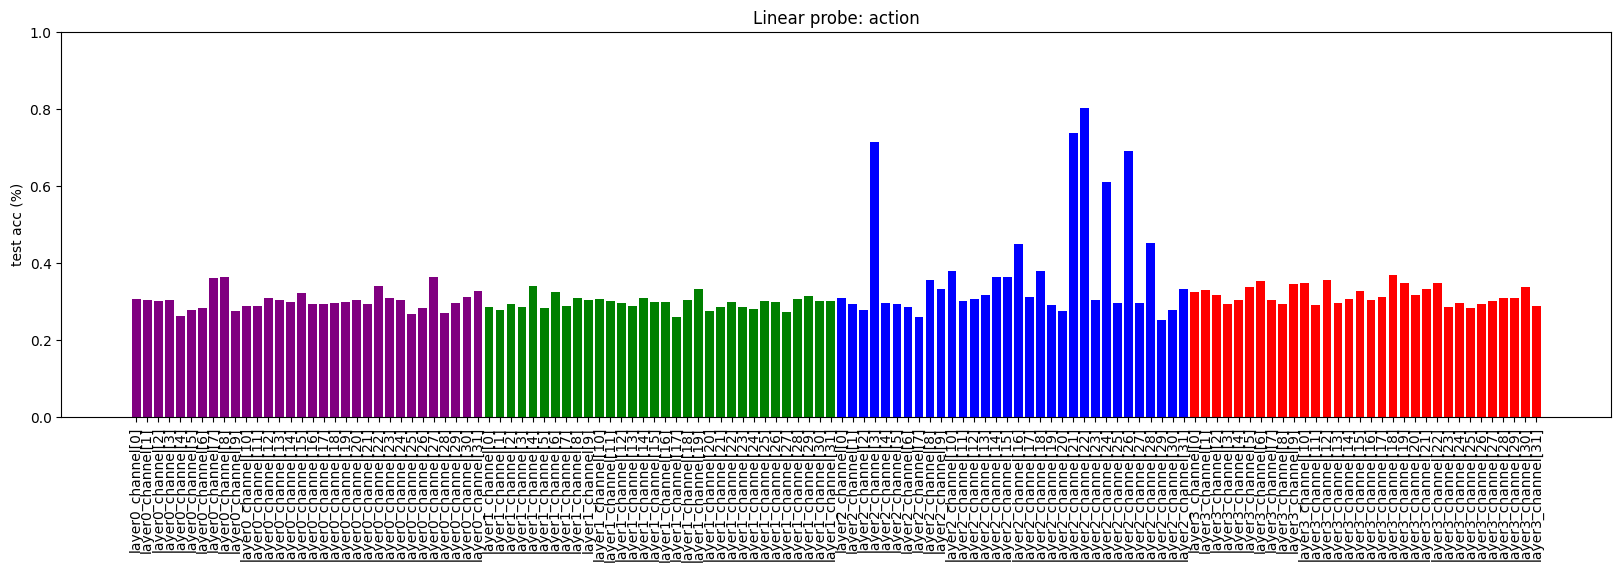

In [29]:
feature = "action"
results = pd.read_csv(f"./results/{feature}_indiv_random.csv")
test_accs = list(results.iloc[-1,1:])
labs = ["_".join(x.split("_")[-3:-1]) for x in results.keys().to_list()[1:]]
fig, ax = plt.subplots(figsize=(20,5))
color = ["purple"]*32 + ["green"]*32 + ["blue"]*32 + ["red"]*32
ax.bar(labs, test_accs, color=color)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0,1)
ax.set_ylabel("test acc (%)")
ax.set_title(f"Linear probe: {feature}")
plt.show()

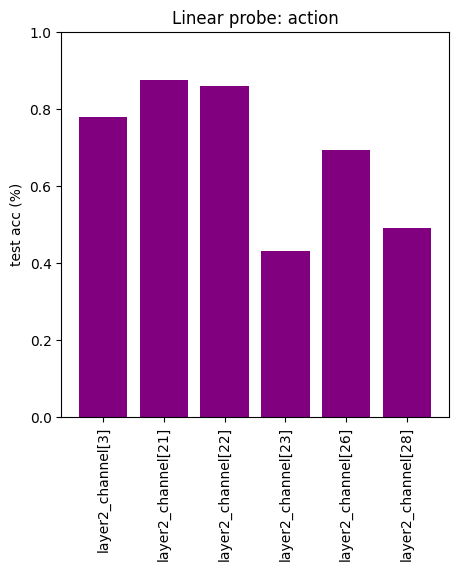

In [10]:
feature = "action"
results = pd.read_csv(f"./results/{feature}_indiv_soon2.csv")
test_accs = list(results.iloc[-1,1:])[-6:]
labs = ["_".join(x.split("_")[-3:-1]) for x in results.keys().to_list()[1:]][-6:]
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(labs, test_accs, color=color)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0,1)
ax.set_ylabel("test acc (%)")
ax.set_title(f"Linear probe: {feature}")
plt.show()

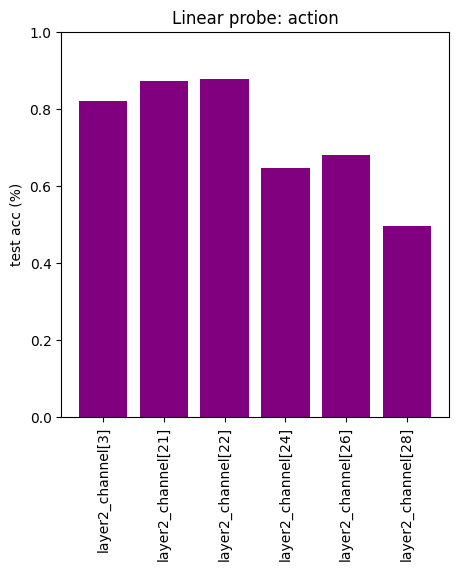

In [16]:
feature = "action"
results = pd.read_csv(f"./results/{feature}_indiv_soon1.csv")
test_accs = list(results.iloc[-1,1:])[-6:]
labs = ["_".join(x.split("_")[-3:-1]) for x in results.keys().to_list()[1:]][-6:]
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(labs, test_accs, color=color)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0,1)
ax.set_ylabel("test acc (%)")
ax.set_title(f"Linear probe: {feature}")
plt.show()

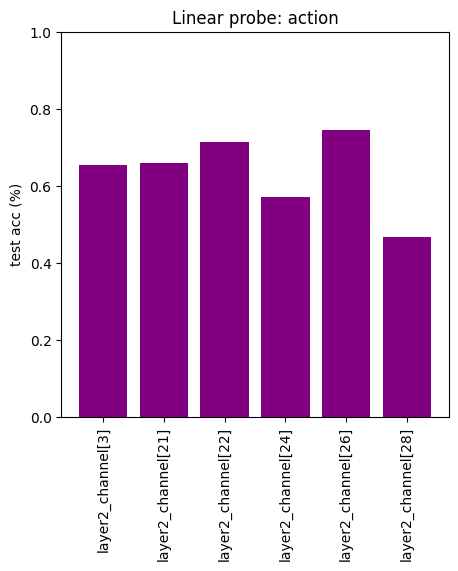

In [13]:
feature = "action"
results = pd.read_csv(f"./results/{feature}_indiv_start1.csv")
test_accs = list(results.iloc[-1,1:])[-6:]
labs = ["_".join(x.split("_")[-3:-1]) for x in results.keys().to_list()[1:]][-6:]
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(labs, test_accs, color=color)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0,1)
ax.set_ylabel("test acc (%)")
ax.set_title(f"Linear probe: {feature}")
plt.show()

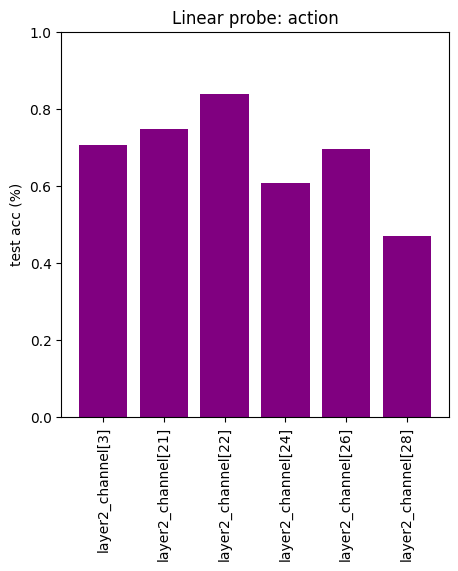

In [17]:
feature = "action"
results = pd.read_csv(f"./results/{feature}_indiv_1onebox.csv")
test_accs = list(results.iloc[-1,1:])[-6:]
labs = ["_".join(x.split("_")[-3:-1]) for x in results.keys().to_list()[1:]][-6:]
fig, ax = plt.subplots(figsize=(5,5))
ax.bar(labs, test_accs, color=color)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0,1)
ax.set_ylabel("test acc (%)")
ax.set_title(f"Linear probe: {feature}")
plt.show()

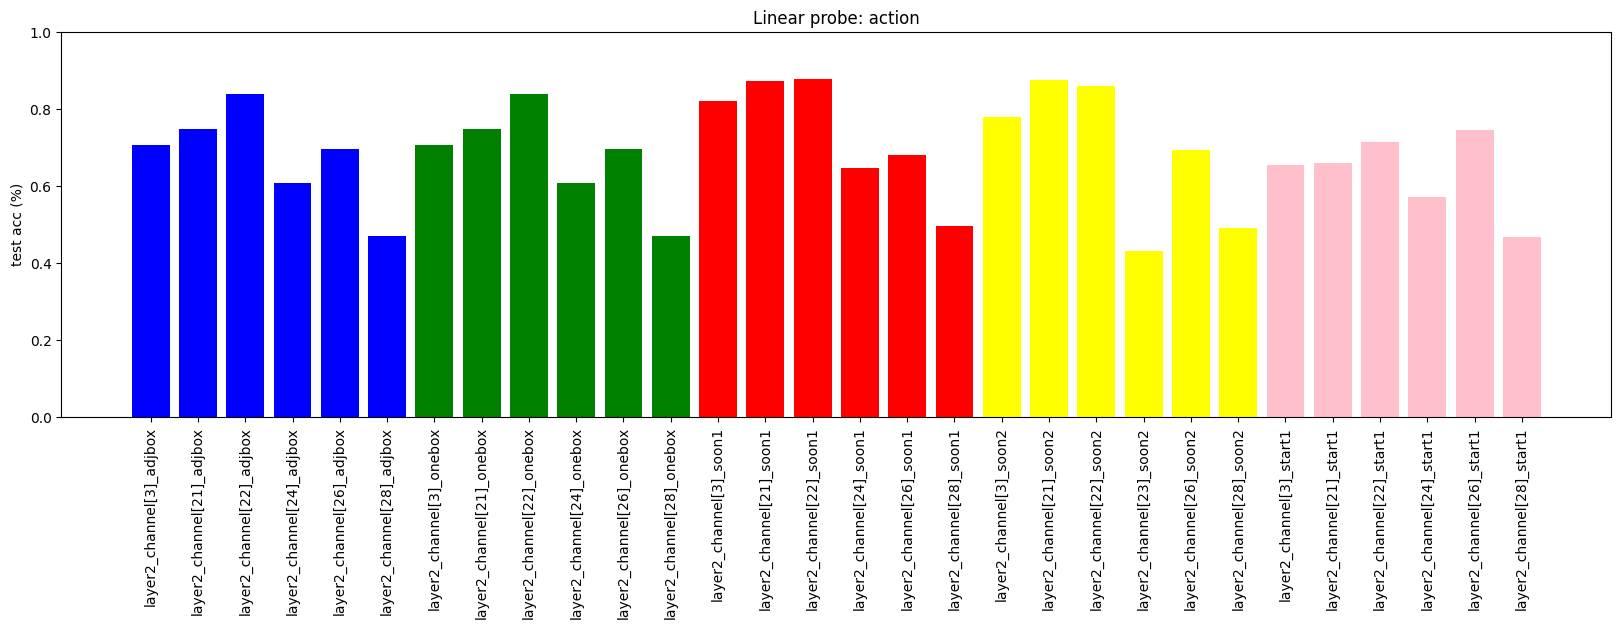

In [29]:
feature = "action"
results = pd.read_csv(f"./results/{feature}_indiv_1adjbox.csv")
test_accs = list(results.iloc[-1,1:])[-6:]
labs = ["_".join(x.split("_")[-3:-1] + ["adjbox"]) for x in results.keys().to_list()[1:]][-6:]
results = pd.read_csv(f"./results/{feature}_indiv_1onebox.csv")
test_accs += list(results.iloc[-1,1:])[-6:]
labs += ["_".join(x.split("_")[-3:-1] + ["onebox"]) for x in results.keys().to_list()[1:]][-6:]
results = pd.read_csv(f"./results/{feature}_indiv_soon1.csv")
test_accs += list(results.iloc[-1,1:])[-6:]
labs += ["_".join(x.split("_")[-3:-1] + ["soon1"]) for x in results.keys().to_list()[1:]][-6:]
results = pd.read_csv(f"./results/{feature}_indiv_soon2.csv")
test_accs += list(results.iloc[-1,1:])[-6:]
labs += ["_".join(x.split("_")[-3:-1] + ["soon2"]) for x in results.keys().to_list()[1:]][-6:]
results = pd.read_csv(f"./results/{feature}_indiv_start1.csv")
test_accs += list(results.iloc[-1,1:])[-6:]
labs += ["_".join(x.split("_")[-3:-1] + ["start1"]) for x in results.keys().to_list()[1:]][-6:]
cols = ["blue"] * 6 + ["green"] * 6 + ["red"] *6 + ["yellow"] * 6 + ["pink"] * 6
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(labs, test_accs, color=cols)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim(0,1)
ax.set_ylabel("test acc (%)")
ax.set_title(f"Linear probe: {feature}")
plt.show()

In [22]:
test_accs, labs

([0.70665988815455,
  0.7488561260803254,
  0.8383324860193188,
  0.6075241484494154,
  0.6949669547534316,
  0.4697508896797153,
  0.70665988815455,
  0.7488561260803254,
  0.8383324860193188,
  0.6075241484494154,
  0.6949669547534316,
  0.4697508896797153],
 ['layer2_channel[3]',
  'layer2_channel[21]',
  'layer2_channel[22]',
  'layer2_channel[24]',
  'layer2_channel[26]',
  'layer2_channel[28]',
  'layer2_channel[3]',
  'layer2_channel[21]',
  'layer2_channel[22]',
  'layer2_channel[24]',
  'layer2_channel[26]',
  'layer2_channel[28]'])